In [56]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

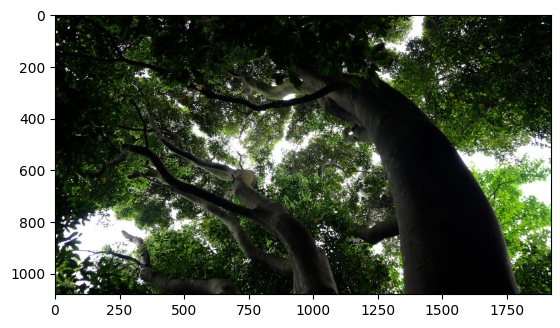

In [96]:
img1 = cv2.imread("../cv_data/tree.bmp")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

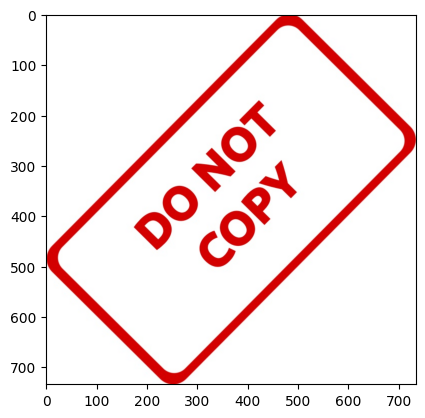

In [97]:
img2 = cv2.imread("../cv_data/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [98]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


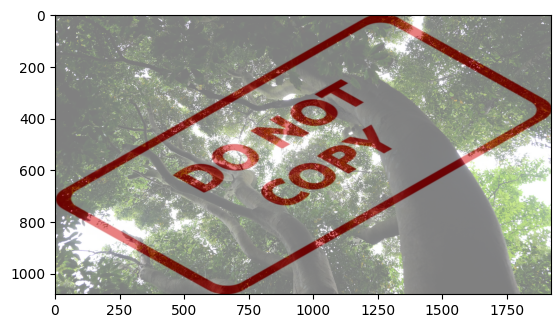

In [99]:
blended = cv2.addWeighted(src1 = img1, alpha=0.5, src2=img2, beta = 0.5, gamma=0)
plt.imshow(blended)

In [100]:
img2 = cv2.resize(img2, (600, 600))

In [101]:
print(img1.shape, img2.shape)

(1080, 1920, 3) (600, 600, 3)


In [102]:
large_img = img1.copy()
small_img = img2.copy()
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img

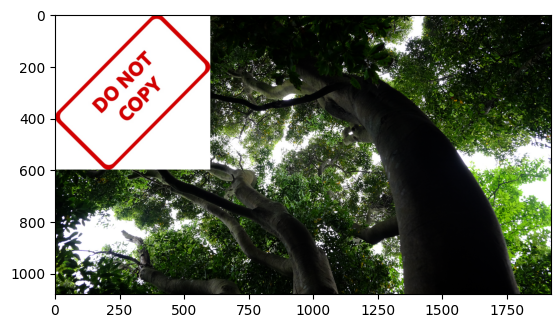

In [103]:
plt.imshow(large_img)

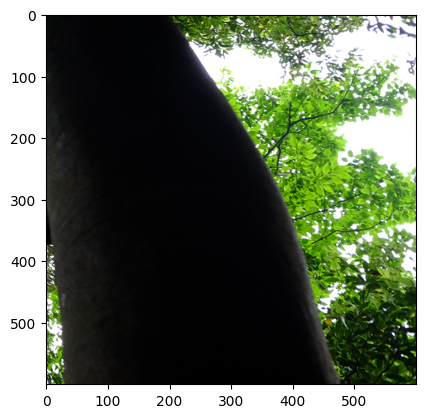

In [104]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

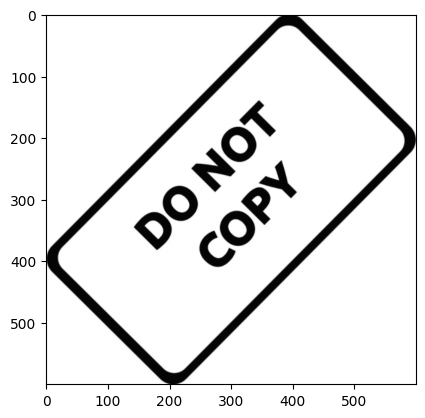

In [105]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap="gray")


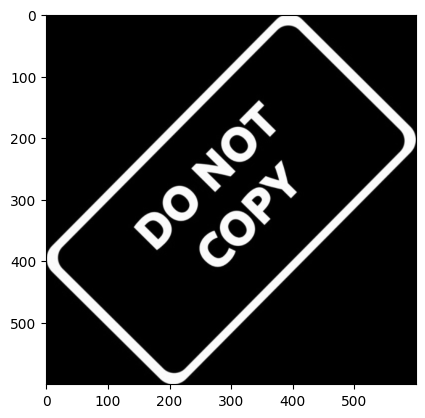

In [106]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap="gray")

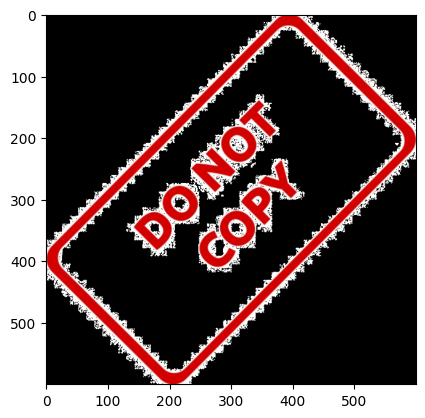

In [107]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

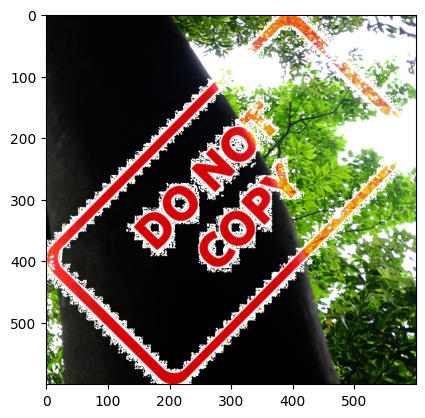

In [108]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

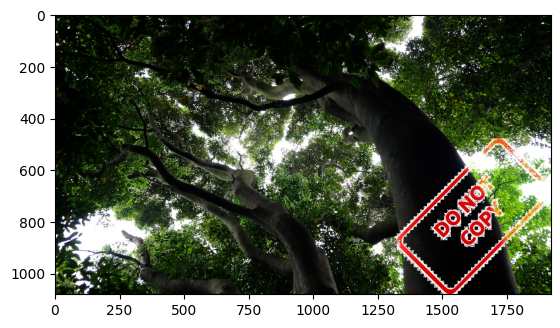

In [109]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

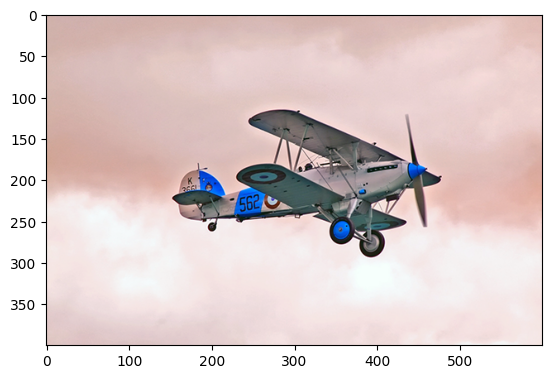

In [110]:
src = cv2.imread("../cv_data/airplane.bmp", cv2.IMREAD_COLOR)
plt.imshow(src)

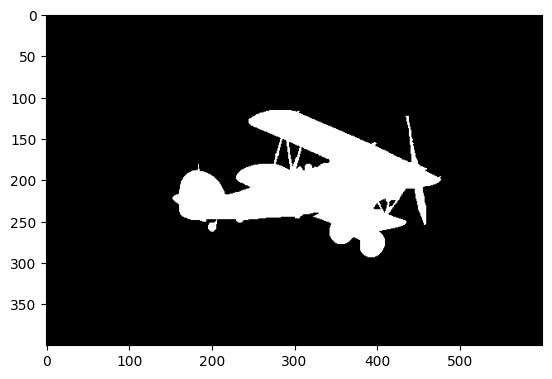

In [111]:
mask = cv2.imread("../cv_data/mask_plane.bmp",cv2.IMREAD_GRAYSCALE)
plt.imshow(mask,cmap="gray")

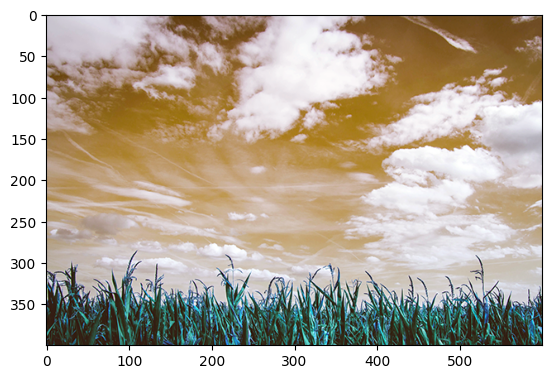

In [112]:
dst = cv2.imread("../cv_data/field.bmp", cv2.IMREAD_COLOR)
plt.imshow(dst)


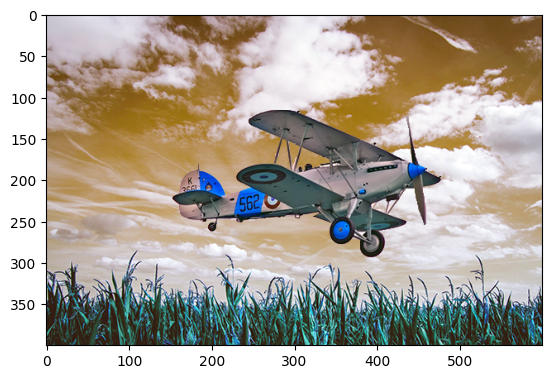

In [113]:
plt.imshow(cv2.copyTo(src, mask, dst))